## Day1: Initial Project Idea Discussion and Data exploration

In [1]:
"""Import Libraries"""

# import basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# import datasets
from datasets import load_dataset

# import libraries to clean text
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [2]:
# get imdb dataset
ds = load_dataset("imdb")

In [3]:
# view structure
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
# store train and test in seperate dataframes
ds_train = pd.DataFrame(ds['train'])
ds_test = pd.DataFrame(ds['test'])

In [5]:
# view one of the text outputs
ds_train['text'][1]

'"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, and the s

#### Preprocessing Functions

In [8]:
# function to remove html tags
def remove_html_tags(review):
    clean_text = re.sub('<.*?>', '', review)
    return clean_text

# function to remove punctuation
def remove_punctuation(review):
    no_punc = review.translate(str.maketrans("","", string.punctuation))
    return no_punc

# function for tokenization
def tokenization(review):
    tokens = review.lower().split()
    return tokens

# function to remove stopwords
def remove_stopwords(review):
    stop_words = set(stopwords.words('english'))
    no_stop_words = [word for word in review if word not in stop_words]
    return no_stop_words

#function to lemmatize
def lemmatize(review):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in review]
    return lemmatized_words

# function for stem word
def stemming (review):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in review]
    return stemmed_words

In [9]:
'''Because a BERT model will be used, preprocessing will be kept
to a minimum with html and punction_removal and tokenization in order to keep context and nuance'''

# function to remove html tags
def remove_html_tags(review):
    clean_text = re.sub('<.*?>', '', review)
    return clean_text

# function to remove punctuation
def remove_punctuation(review):
    no_punc = review.translate(str.maketrans("","", string.punctuation))
    return no_punc


# function for tokenization
def tokenization(review):
    tokens = review.lower().split()
    return tokens


# make a preprocessing function that
def preprocessing(review):
    preprocess = review['text'].apply(lambda x: remove_html_tags(x))
    preprocess = preprocess.apply(lambda x: remove_punctuation(x))
    preprocess= preprocess.apply(lambda x: tokenization(x))
    return preprocess

In [10]:
ds_train['preprocessed'] = preprocessing(ds_train)
ds_train.head()

,text,label,preprocessed
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,"[i, rented, i, am, curiousyellow, from, my, vi..."
1,"""I Am Curious: Yellow"" is a risible and preten...",0,"[i, am, curious, yellow, is, a, risible, and, ..."
2,If only to avoid making this type of film in t...,0,"[if, only, to, avoid, making, this, type, of, ..."
3,This film was probably inspired by Godard's Ma...,0,"[this, film, was, probably, inspired, by, goda..."
4,"Oh, brother...after hearing about this ridicul...",0,"[oh, brotherafter, hearing, about, this, ridic..."


## Day 2 Notes

Based off of yesterday's brainstorming session a good approach for NLP understanding will be to compare traditional ML vs BERT-untrained and BERT-trained

In [11]:
def plot_eda(review):
    # Class distribution
    sns.countplot(x='label', data=review)
    plt.title('Class Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

     # Review length distribution
    ds_train['text_length'] = ds_train['text'].apply(lambda x: len(x))
    sns.histplot(ds_train['text_length'], bins=50)
    plt.title('Review Length Distribution')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

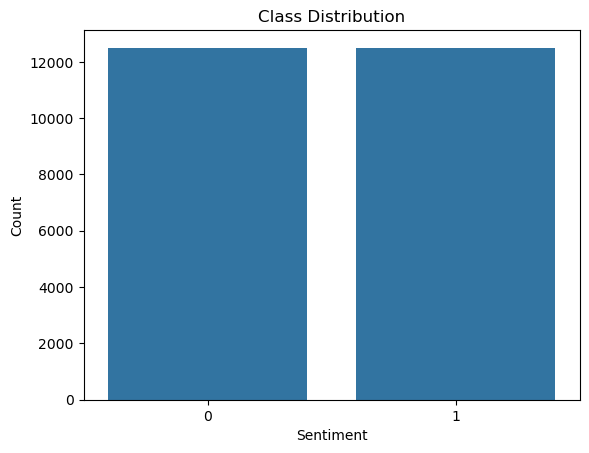

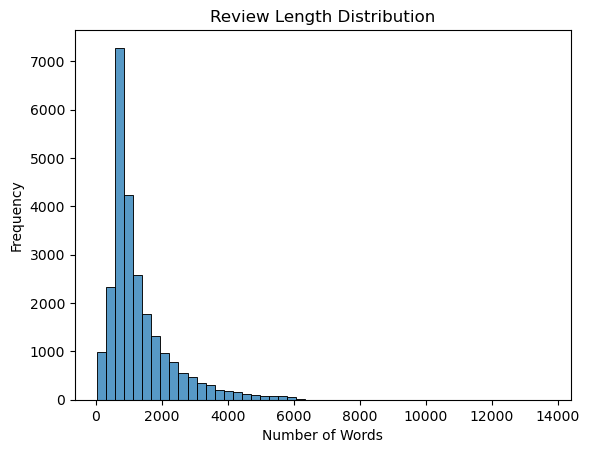

In [12]:
visual= plot_eda(ds_train)

### Embedding

Using representation to vectorize our tokens into numercial values that can be calculated for text classification.



In [17]:
# use TF-IDF vectorization for embedding and modeling
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

def features_tfidf(review):
    vectorizer = TfidfVectorizer(max_features = 10000)
    return vectorizer.fit_transform(review)




In [ ]:
'''The 3 models to test out'''

# Traditional ML
from sklearn.linear_model import LogisticRegression

# BERT-untrained
from transformers import DistilBertConfig
from transformers import DistilBertForSequenceClassification
from transformers import Trainer
from transformers import TrainingArguments
from transformers import DistilBertTokenizerFast

# Bert-trained
from transformers import DistilBertForSequenceClassification
from transformers import Trainer
from transformers import TrainingArguments


# Traditional ML function
def train_traditonal(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    model.su
    return model

# From Scratch
def BERT_untrained(review):
    config = DistilBertConfig(num_labels=2)
    model = DistilBertForSequenceClassification(config)
    return model

#Trained
def BERT_trained(review):
    tokenizer = DistilBertTokenizerFast.from_pretrained("distilber-base-uncased")
    model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels= 2)

    return model



In [21]:
# apply Traditional ML steps to training data
ds_train['tfidf'] = features_tfidf(ds_train['preprocessed'])
ds_train['tfidf'].head()


AttributeError: 'list' object has no attribute 'lower'